<a href="https://colab.research.google.com/github/LuizWalker/PIM---Processamento-de-Imagens-Medicas/blob/main/PIM_Mestrado_Atividade_02_Segunda_Parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE 2 - SEGUNDA PARTE**

##LEANDRO GONÇALVES
##LUIZ WALKER

#Importação de bibliotecas e imagens

In [ ]:
# Acessando Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import copy
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


#Carregando imagens

path_img1_small = '/content/drive/MyDrive/PDI/Jardim_Simples_640_427.jpg'
path_img1_big = '/content/drive/MyDrive/PDI/Jardim_Simples_1280_853.jpg'


#path_img2 = '/content/drive/MyDrive/PDI/Parede_Vaso.jpg'
#path_img3 = '/content/drive/MyDrive/PDI/Parede_quadro.jpg'
#path_img4 = '/content/drive/MyDrive/PDI/Xícara_Café.jpg'

#Leitura imagens:

img_matrix1_small = cv2.imread(path_img1_small)
#cv2_imshow(img_matrix1_small)

print("\n\n\n")

img_matrix1_big = cv2.imread(path_img1_big)
#cv2_imshow(img_matrix1_big)

#img_matrix2 = cv2.imread(path_img2)
#img_matrix3 = cv2.imread(path_img3)
#img_matrix4 = cv2.imread(path_img4)


In [ ]:
img_matrix_small_gray = cv2.imread(path_img1_small, 0)

img_matrix_big_gray = cv2.imread(path_img1_big, 0)



#Interpolação das imagens - Construção das funções

##Menor Resolução -> Maior Resolução

In [ ]:
img_original_grey = img_matrix_big_gray
#cv2_imshow(img_original_grey)
if img_original_grey is not None:
  print(img_original_grey.shape)
else:
  print("Error: Image not loaded. Please check the file path.")

(853, 1280)


In [ ]:
img_test_grey = img_matrix_small_gray
#cv2_imshow(img_test_grey)
print(img_test_grey.shape)

(427, 640)


In [ ]:
#Função da média

def cv2_media_pixels(imagem_teste, largura_nova, altura_nova, janela):

  array_original = imagem_teste
  largura_original = array_original.shape[1]
  altura_original = array_original.shape[0]

  imagem_nova = np.zeros((altura_nova, largura_nova), dtype=np.uint8)

  raio = janela // 2

  for y_novo in range(altura_nova):
      for x_novo in range(largura_nova):
          # Mapeia as coordenadas da nova imagem para as da imagem original
          x_original = int(x_novo * largura_original / largura_nova)
          y_original = int(y_novo * altura_original / altura_nova)

          # Garante que as coordenadas não ultrapassem os limites
          x1 = max(0, x_original - raio)
          y1 = max(0, y_original - raio)
          x2 = min(largura_original - 1, x_original + raio)
          y2 = min(altura_original - 1, y_original + raio)

          bloco_pixels = array_original[y1:y2+1, x1:x2+1] #Altera a janela de pixels

          media_pixels = np.mean(bloco_pixels)#Alterar essa função(moda, media e mediana)

          imagem_nova[y_novo, x_novo] = media_pixels

  return imagem_nova

In [ ]:
def cv2_pixels_median(imagem_teste, largura_nova, altura_nova, janela):

  array_original = imagem_teste
  largura_original = array_original.shape[1]
  altura_original = array_original.shape[0]

  imagem_nova = np.zeros((altura_nova, largura_nova), dtype=np.uint8)

  raio = janela // 2

  for y_novo in range(altura_nova):
      for x_novo in range(largura_nova):
          # Mapeia as coordenadas da nova imagem para as da imagem original
          x_original = int(x_novo * largura_original / largura_nova)
          y_original = int(y_novo * altura_original / altura_nova)

          # Garante que as coordenadas não ultrapassem os limites
          x1 = max(0, x_original - raio)
          y1 = max(0, y_original - raio)
          x2 = min(largura_original - 1, x_original + raio)
          y2 = min(altura_original - 1, y_original + raio)

          bloco_pixels = array_original[y1:y2+1, x1:x2+1] #Altera a janela de pixels

          pixels_median = np.median(bloco_pixels)#Alterar essa função(moda, media e mediana)

          imagem_nova[y_novo, x_novo] = pixels_median

  return imagem_nova

In [ ]:
from scipy import stats

def cv2_pixels_mode(imagem_teste, largura_nova, altura_nova, janela):

  array_original = imagem_teste
  largura_original = array_original.shape[1]
  altura_original = array_original.shape[0]

  imagem_nova = np.zeros((altura_nova, largura_nova), dtype=np.uint8)

  raio = janela // 2

  for y_novo in range(altura_nova):
      for x_novo in range(largura_nova):
          # Mapeia as coordenadas da nova imagem para as da imagem original
          x_original = int(x_novo * largura_original / largura_nova)
          y_original = int(y_novo * altura_original / altura_nova)

          # Garante que as coordenadas não ultrapassem os limites
          x1 = max(0, x_original - raio)
          y1 = max(0, y_original - raio)
          x2 = min(largura_original - 1, x_original + raio)
          y2 = min(altura_original - 1, y_original + raio)

          bloco_pixels = array_original[y1:y2+1, x1:x2+1] #Altera a janela de pixels

          pixels_mode = stats.mode(bloco_pixels, axis = None)[0]#Alterar essa função(moda, media e mediana)

          imagem_nova[y_novo, x_novo] = pixels_mode

  return imagem_nova

###Janela 2x2, 3x3 e 5x5

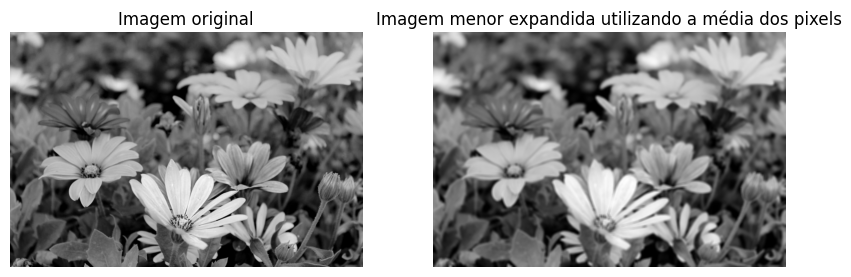

In [ ]:
new_image_media = cv2_media_pixels(img_test_grey, img_original_grey.shape[1], img_original_grey.shape[0], 4)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(new_image_media, cmap='gray')
plt.title("Imagem menor expandida utilizando a média dos pixels")
plt.axis("off")

plt.show()

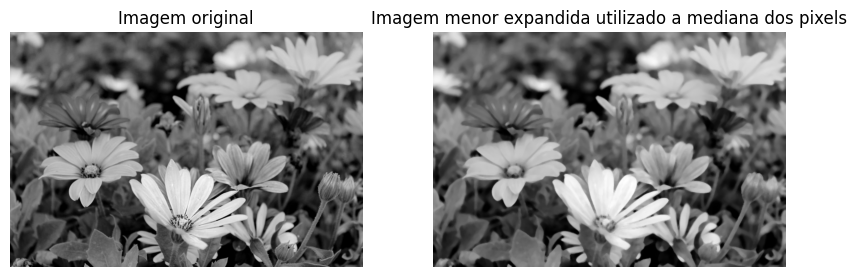

In [ ]:
new_image_mediana = cv2_pixels_median(img_test_grey, img_original_grey.shape[1], img_original_grey.shape[0], 4)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(new_image_mediana, cmap='gray')
plt.title("Imagem menor expandida utilizado a mediana dos pixels")
plt.axis("off")

plt.show()

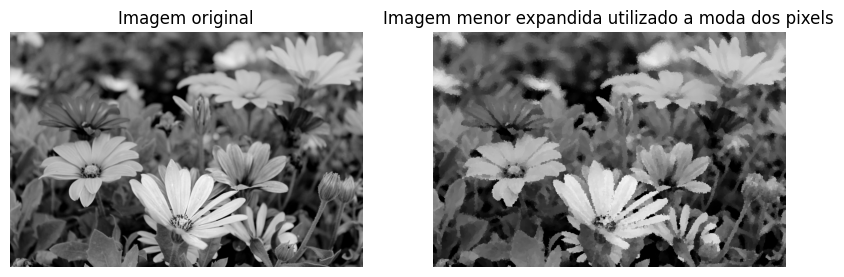

In [ ]:
new_image_moda = cv2_pixels_mode(img_test_grey, img_original_grey.shape[1], img_original_grey.shape[0], 4)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(new_image_moda, cmap='gray')
plt.title("Imagem menor expandida utilizado a moda dos pixels")
plt.axis("off")

plt.show()

##Comparação entre as imagens

###Métrica SSIM

In [ ]:
#O erro "ValueError: Since image dtype is floating point, you must specify the data_range parameter"
#ocorre porque a função SSIM (Structural Similarity Index) da biblioteca scikit-image precisa saber a faixa de valores
#possíveis nos pixels da imagem para calcular a similaridade corretamente. Precisa usar o dtype na construção da nova imagem

from skimage.metrics import structural_similarity as ssim

SSIM_rate_media = ssim(img_original_grey,new_image_media)
print("Taxa de proximidade entre a imagem original e a redimensionada pela média: ", SSIM_rate_media)

print('\n')

SSIM_rate_mediana = ssim(img_original_grey,new_image_mediana)
print("Taxa de proximidade entre a imagem original e a redimensionada pela mediana: ", SSIM_rate_mediana )

print('\n')

SSIM_rate_moda = ssim(img_original_grey,new_image_moda)
print("Taxa de proximidade entre a imagem original e a redimensionada pela moda: ", SSIM_rate_moda)


Taxa de proximidade entre a imagem original e a redimensionada pela média:  0.8712229612523303


Taxa de proximidade entre a imagem original e a redimensionada pela mediana:  0.8996721137335114


Taxa de proximidade entre a imagem original e a redimensionada pela moda:  0.7432201182139825


###Métrica PSNR

In [ ]:
PSNR_rate_media = cv2.PSNR(img_original_grey,new_image_media)
print("Taxa de proximidade entre a imagem original e a redimensionada pela média: ", PSNR_rate_media)

print('\n')

PSNR_rate_mediana = cv2.PSNR(img_original_grey,new_image_mediana)
print("Taxa de proximidade entre a imagem original e a redimensionada pela mediana: ", PSNR_rate_mediana)

print('\n')

PSNR_rate_moda = cv2.PSNR(img_original_grey,new_image_moda)
print("Taxa de proximidade entre a imagem original e a redimensionada pela moda: ", PSNR_rate_moda)

Taxa de proximidade entre a imagem original e a redimensionada pela média:  28.088786792989303


Taxa de proximidade entre a imagem original e a redimensionada pela mediana:  29.305385989851164


Taxa de proximidade entre a imagem original e a redimensionada pela moda:  23.649223413178227


##Maior Resolução -> Menor Resolução

In [ ]:
img_original_grey_2 = img_matrix_small_gray
#cv2_imshow(img_original_grey)
print(img_original_grey_2.shape)

(427, 640)


In [ ]:
img_test_grey_2 =  img_matrix_big_gray
#cv2_imshow(img_test_grey)
print(img_test_grey_2.shape)

(853, 1280)


###Janela 2x2, 3x3 e 5x5


(427, 640)


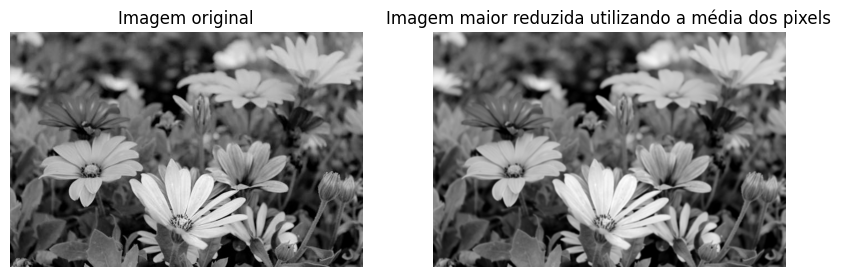

In [ ]:
new_image_media_2 = cv2_media_pixels(img_test_grey_2, img_original_grey_2.shape[1], img_original_grey_2.shape[0], 4)

print(new_image_media_2.shape)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey_2, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(new_image_media_2, cmap='gray')
plt.title("Imagem maior reduzida utilizando a média dos pixels")
plt.axis("off")

plt.show()

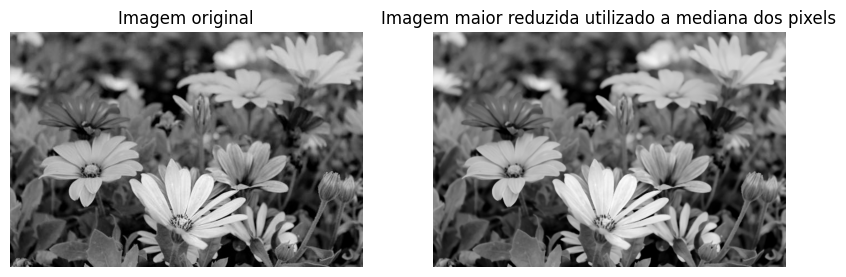

In [ ]:
new_image_mediana_2 = cv2_pixels_median(img_test_grey_2, img_original_grey_2.shape[1], img_original_grey_2.shape[0], 4)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey_2, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(new_image_mediana_2, cmap='gray')
plt.title("Imagem maior reduzida utilizado a mediana dos pixels")
plt.axis("off")

plt.show()

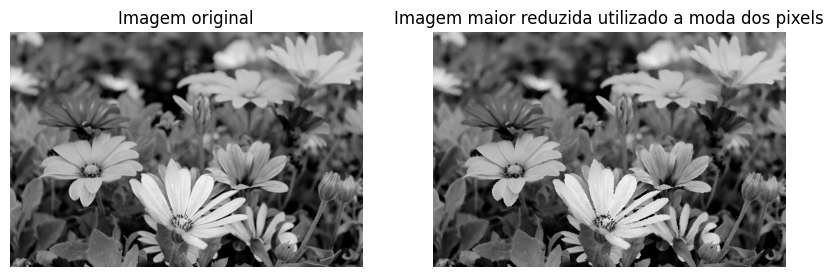

In [ ]:
new_image_moda_2 = cv2_pixels_mode(img_test_grey_2, img_original_grey_2.shape[1], img_original_grey_2.shape[0], 4)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_original_grey_2, cmap='gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(new_image_moda_2, cmap='gray')
plt.title("Imagem maior reduzida utilizado a moda dos pixels")
plt.axis("off")

plt.show()

##Comparação entre as imagens

###Métrica SSIM

In [ ]:
from skimage.metrics import structural_similarity as ssim

SSIM_rate_media_2 = ssim(img_original_grey_2,new_image_media_2)
print("Taxa de proximidade entre a imagem original e a redimensionada pela média: ", SSIM_rate_media_2)

print('\n')

SSIM_rate_mediana_2 = ssim(img_original_grey_2,new_image_mediana_2)
print("Taxa de proximidade entre a imagem original e a redimensionada pela mediana: ", SSIM_rate_mediana_2)

print('\n')

SSIM_rate_moda_2 = ssim(img_original_grey_2,new_image_moda_2)
print("Taxa de proximidade entre a imagem original e a redimensionada pela moda: ", SSIM_rate_moda_2)

Taxa de proximidade entre a imagem original e a redimensionada pela média:  0.9666598694990786


Taxa de proximidade entre a imagem original e a redimensionada pela mediana:  0.9678484609406864


Taxa de proximidade entre a imagem original e a redimensionada pela moda:  0.9099714921693765


###Métrica PSNR

In [ ]:
PSNR_rate_media_2 = cv2.PSNR(img_original_grey_2,new_image_media_2)
print("Taxa de proximidade entre a imagem original e a redimensionada pela média: ", PSNR_rate_media_2)

print('\n')

PSNR_rate_mediana_2 = cv2.PSNR(img_original_grey_2,new_image_mediana_2)
print("Taxa de proximidade entre a imagem original e a redimensionada pela mediana: ", PSNR_rate_mediana_2)

print('\n')

PSNR_rate_moda_2 = cv2.PSNR(img_original_grey_2,new_image_moda_2)
print("Taxa de proximidade entre a imagem original e a redimensionada pela moda: ", PSNR_rate_moda_2)

Taxa de proximidade entre a imagem original e a redimensionada pela média:  33.726334268170284


Taxa de proximidade entre a imagem original e a redimensionada pela mediana:  34.1137728524644


Taxa de proximidade entre a imagem original e a redimensionada pela moda:  27.64580579832134


#Código do Gemini após todas as dúvidas

In [ ]:
import cv2
import numpy as np

def redimensionar_cinza_por_media_cv2(imagem_menor, largura_nova, altura_nova, tamanho_janela=3):
    """
    Redimensiona uma imagem menor em tons de cinza para as novas dimensões
    usando a média dos pixels de uma janela NxN.
    """
    array_original = imagem_menor
    altura_original, largura_original = array_original.shape[:2]

    array_novo = np.zeros((altura_nova, largura_nova), dtype=np.uint8)

    # Define o "raio" da janela para o cálculo das coordenadas
    raio = tamanho_janela // 2

    for y_novo in range(altura_nova):
        for x_novo in range(largura_nova):
            # Mapeia as coordenadas da nova imagem para as da imagem original
            x_original = int(x_novo * largura_original / largura_nova)
            y_original = int(y_novo * altura_original / altura_nova)

            # Ajuste para a nova janela (com base no raio)
            x1 = max(0, x_original - raio)
            y1 = max(0, y_original - raio)
            x2 = min(largura_original - 1, x_original + raio)
            y2 = min(altura_original - 1, y_original + raio)

            # Pega o bloco de pixels
            bloco_pixels = array_original[y1:y2+1, x1:x2+1]

            # Calcula a média dos pixels no bloco
            media_pixels = np.mean(bloco_pixels)

            # Atribui o valor da média ao novo pixel
            array_novo[y_novo, x_novo] = media_pixels

    return array_novo

# --- Exemplo de Uso com Janela 3x3 ---
if __name__ == '__main__':
    imagem_menor_array = np.full((20, 20), 150, dtype=np.uint8)
    largura_maior = 40
    altura_maior = 40

    # Chame a função passando o novo tamanho da janela
    imagem_redimensionada_3x3 = redimensionar_cinza_por_media_cv2(
        imagem_menor_array, largura_maior, altura_maior, tamanho_janela=3
    )

    cv2.imwrite('imagem_redimensionada_3x3.png', imagem_redimensionada_3x3)

    print("Imagem com filtro de média 3x3 salva como 'imagem_redimensionada_3x3.png'")

Imagem com filtro de média 3x3 salva como 'imagem_redimensionada_3x3.png'
